In [3]:
#load libraries 
import time,os
from matplotlib.offsetbox import AnchoredText
import sys,pandas as pd, matplotlib , matplotlib.pyplot as plt, matplotlib.lines , numpy as np,cupy as cp, math, pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#import cudf
#import ROOT
#from ROOT import TFile

#import root_pandas

#from toggle_cell import hide_cell 
import uproot3
%matplotlib inline

#presets for plot style
from scipy.constants import golden
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (7, 7/golden),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

viridis = cm.get_cmap('viridis', 12)
inferno = cm.get_cmap('inferno', 12)
autumn = cm.get_cmap('autumn', 12)

#physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)
#tf.config.experimental.set_memory_growth(physical_devices[1], True)
rc = plt.rc
rc('text', usetex=False)
import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=False)
rc('font', size=15)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)
import root_pandas,glob

import gc

def read_n(pattern, n):
    if not '*' in pattern:
        a = root_pandas.read_root(pattern,chunksize=int(n))
    else:
        a = root_pandas.read_root(glob.glob(pattern),chunksize=int(n))
    for b in a:
        del a
        print(len(b))
        return b

from scipy.optimize import curve_fit

image_dir='/home/sebouh/dihadron-analysis-note/images/'

import misc_util

/home/sebouh/.local/lib/python3.8/site-packages/uproot3/__init__.py:127: FutureWarning: Consider switching from 'uproot3' to 'uproot', since the new interface became the default in 2020.

    pip install -U uproot

In Python:

    >>> import uproot
    >>> with uproot.open(...) as file:
    ...

  warnings.warn(
/home/sebouh/.local/lib/python3.8/site-packages/awkward0/__init__.py:12: FutureWarning: Consider switching from 'awkward0' to 'awkward', since the new interface became the default in 2020.

    pip install -U awkward

In Python:

    >>> import awkward as ak
    >>> new_style_array = ak.from_awkward0(old_style_array)
    >>> old_style_array = ak.to_awkward0(new_style_array)

  warnings.warn(


Welcome to JupyROOT 6.22/06


In [4]:

def offset(a):
    return a+2*np.pi*(a<-np.pi/2)-2*np.pi*(a>=3*np.pi/2)

In [5]:
mc_dihadrons_outb = root_pandas.read_root(glob.glob("/home/sebouh/tuples_hadd/mc_dihadrons_outb.root"),'dihadrons')
mc_dihadrons_inb = root_pandas.read_root(glob.glob("/home/sebouh/tuples_hadd/mc_dihadrons_inb.root"),'dihadrons')

In [134]:
#mc_dihadrons_inb = root_pandas.read_root(glob.glob("../in/mc_test_inb.root"),'dihadrons')

In [6]:
#mc_mixed_inb = root_pandas.read_root(glob.glob('/home/sebouh/sidis_tuples/in/mc_test_inb_mix*.root'))

In [7]:
#mc_mixed_ecuts_inb = root_pandas.read_root(glob.glob('/home/sebouh/sidis_tuples/in/mc_test_inb_mix_ecuts*.root'))

In [6]:
data_dihadrons_inb = read_n(glob.glob("/home/sebouh/tuples_hadd/inb*_dihadrons*.root"),1e8)

6828158


In [7]:
data_mixed_ecuts_inb = read_n(glob.glob('/home/sebouh/tuples_hadd/*inb*_mixed_small.root'),1e7)

10000000


In [8]:
data_mixed_inb = read_n(glob.glob('../in/data_test_inb_mix*.root'),1e8)

11756170


In [9]:
#mc_dihadrons_outb = root_pandas.read_root(glob.glob("../in/mc_test_outb.root"),'dihadrons')

In [10]:
#mc_mixed_ecuts_outb = root_pandas.read_root(glob.glob('/home/sebouh/sidis_tuples/in/mc_test_outb_mix_ecuts*.root'))

In [11]:
#mc_mixed_outb = root_pandas.read_root(glob.glob('/home/sebouh/sidis_tuples/in/mc_test_outb_mix*.root'))

In [12]:
data_dihadrons_outb = read_n(glob.glob("/home/sebouh/tuples_hadd/outb*_dihadrons*.root"),1e8)

21732565


In [13]:
data_mixed_ecuts_outb = read_n(glob.glob('/home/sebouh/tuples_hadd/*outb*_mixed_small.root'),1e7)

10000000


In [14]:
data_mixed_outb = read_n(glob.glob('../in/data_test_outb_mix*.root'),1e8)

15875520


In [9]:

#df_trig = data_triggers.query("h_cm_pt>0.3 and abs(h_pid) == 211")

In [28]:
def plot2():
    projyrange=(1.5,2.5)
    bins = 20
    fig,axs = plt.subplots(2,3,figsize=(14,10))
    for df,df_mixed,df_mc,row,lbl in zip([pi_p,pi_pi],[pi_p_mixed_ecuts,pi_pi_mixed_ecuts],
                                                 [pi_p_mc,pi_pi_mc],axs,
                                                     "$\\pi{}p$ $\\pi\\pi$".split()):
        q = ("diff_rap_cm > %s and diff_rap_cm < %s" %projyrange) + " and h2_z<0.5 and h2_z<h1_z and h2_p>0"
        denom = len(df.query(q))*2*np.pi/bins
        ys, x = np.histogram(offset(df.query(q).diff_phi_cm), bins=bins, range=(-np.pi/2,3*np.pi/2))
        x = np.add(x[1:],x[:-1])/2
        dys = np.sqrt(ys)
        ys=np.divide(ys,denom)
        dys=np.divide(dys,denom)

        denom = len(df_mixed.query(q))*2*np.pi/bins
        ym, x = np.histogram(offset(df_mixed.query(q).diff_phi_cm), bins=bins, range=(-np.pi/2,3*np.pi/2))
        x = np.add(x[1:],x[:-1])/2
        dym = np.sqrt(ym)
        ym=np.divide(ym,denom)
        dym=np.divide(dym,denom)

        dyc = ys/ym*np.hypot(dys/ys, dym/ym)
        yc= ys/ym


        row[0].errorbar(x,ys,dys,color='k',label='data')
        row[1].errorbar(x,ym,dym,color='k')
        row[2].errorbar(x,yc,dyc,color='k')

        ysmc, x = np.histogram(offset(df_mc.query(q).diff_phi_cm), bins=bins, range=(-np.pi/2,3*np.pi/2))
        x = np.add(x[1:],x[:-1])/2
        denom = sum(ysmc)*(x[1]-x[0])
        dysmc = np.sqrt(ysmc)
        ysmc=np.divide(ysmc,denom)
        dysmc=np.divide(dysmc,denom)

        
        

        row[0].errorbar(x,ysmc,dysmc,color='r',label='MC recon')
        #row[1].errorbar(x,ym,dym,color='r')
        #row[2].errorbar(x,yc,dyc,color='r')
        for ax in row:
            ax.set_ylim(0)
        row[0].text(-.5, 0.29, lbl,fontsize='x-large')

        q = ("diff_rap_cm_truth > %s and diff_rap_cm_truth < %s" %projyrange) 
        q += " and h2_truth_z<0.5 and h1_truth_p>0 and h2_truth_p>0 and h2_truth_z<h1_truth_p"
        q += " and h1_truth_cm_pt>0.3 and h2_truth_cm_pt>0.3 and abs(h1_truth_pid) ==211 and h1_truth_z > 0.4"

        mc_dihadrons.eval('mx_eh1x_truth = sqrt((E+e_truth_p+.9383)**2-(-e_truth_px-h1_truth_px)**2'
                          +'-(-e_truth_py-h1_truth_py)**2-(E-e_truth_pz-h1_truth_pz)**2)')

        if df is pi_pi:
            q+= " and abs(h2_truth_pid) == 211"
        else:
            q+= " and h2_truth_pid == 2212"
        yt,x = np.histogram(offset(mc_dihadrons.query(q).diff_phi_cm_truth), bins=bins, range=(-np.pi/2,3*np.pi/2))
        x = np.add(x[1:],x[:-1])/2

        denom = sum(yt)*(x[1]-x[0])
        dyt=np.sqrt(yt)/denom
        yt = yt/denom
        row[2].errorbar(x,yt*2*np.pi,dyt*2*np.pi,color='b')
        row[2].errorbar(x,ys*yt/ysmc*2*np.pi,dys*yt/ysmc*2*np.pi,color='g')
        row[0].errorbar([],[],[],color='b',label='MC truth')
    axs[0][0].legend()

    axs[0][0].set_title("$S(\\Delta\\phi)$")
    axs[0][1].set_title("$M(\\Delta\\phi)$")
    axs[0][2].set_title("$C(\\Delta\\phi)$")


    fig.subplots_adjust(hspace=0.1)
    for ax in axs[-1]:
        ax.set_xlabel("$\\Delta\\phi$ [rad]")

    

In [15]:
data_dihadrons = data_dihadrons_inb
data_mixed = data_mixed_inb
mc_dihadrons = mc_dihadrons_inb
data_mixed_ecuts = data_mixed_ecuts_inb
#mc_mixed = mc_mixed_inb
#mc_mixed_ecuts = mc_mixed_ecuts_inb

pi_p_inb = data_dihadrons.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and h2_pid == 2212 and abs(h1_pid) ==211 and h2_z < 0.5")
pi_p_mixed_inb = data_mixed.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and h2_pid == 2212 and abs(h1_pid) ==211 and h2_z < 0.5")
pi_p_mixed_ecuts_inb = data_mixed_ecuts.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and h2_pid == 2212 and abs(h1_pid) ==211 and h2_z < 0.5")

pi_p_mXcut_inb = data_dihadrons.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and h2_pid == 2212 and mx_eh1x > 1.665 and abs(h1_pid) ==211 and h2_z < 0.5")
pi_p_mXcut_mixed_inb = data_mixed.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and h2_pid == 2212 and mx_eh1x > 1.665 and abs(h1_pid) ==211 and h2_z < 0.5")
pi_p_mXcut_mixed_ecuts_inb = data_mixed_ecuts.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and h2_pid == 2212 and mx_eh1x > 1.665 and abs(h1_pid) ==211 and h2_z < 0.5")

#pi_p_mixed_mc = mc_mixed.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
#        + " and h2_pid == 2212 and abs(h1_pid) ==211 and h2_z < 0.5")
pi_p_mc_inb = mc_dihadrons_inb.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and h2_pid == 2212 and abs(h1_pid) ==211 and h2_z < 0.5")
#pi_p_mixed_ecuts_mc = mc_mixed_ecuts.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
#        + " and h2_pid == 2212 and abs(h1_pid) ==211 and h2_z < 0.5")

pi_p_mXcut_mc_inb = mc_dihadrons.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and h2_pid == 2212 and mx_eh1x > 1.665 and abs(h1_pid) ==211 and h2_z < 0.5")
#pi_p_mXcut_mixed_mc = mc_mixed.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
#        + " and h2_pid == 2212 and mx_eh1x > 1.665 and abs(h1_pid) ==211 and h2_z < 0.5")




pi_pi_inb = data_dihadrons.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and abs(h2_pid) == 211 and abs(h1_pid) ==211 and h2_z < 0.5")
pi_pi_mixed_inb = data_mixed.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and abs(h2_pid) == 211 and abs(h1_pid) ==211 and h2_z < 0.5")
pi_pi_mixed_ecuts_inb = data_mixed_ecuts.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and abs(h2_pid) == 211 and abs(h1_pid) ==211 and h2_z < 0.5")


pi_pi_mc_inb = mc_dihadrons.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and abs(h2_pid) == 211 and abs(h1_pid) ==211 and h2_z < 0.5")
#pi_pi_mixed_mc = mc_mixed.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
#        + " and abs(h2_pid) == 211 and abs(h1_pid) ==211 and h2_z < 0.5")
#pi_pi_mixed_ecuts_mc = mc_mixed_ecuts.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
#        + " and abs(h2_pid) == 211 and abs(h1_pid) ==211 and h2_z < 0.5")

In [ ]:
data_dihadrons = data_dihadrons_outb
data_mixed = data_mixed_outb
mc_dihadrons = mc_dihadrons_outb
data_mixed_ecuts = data_mixed_ecuts_outb
#mc_mixed = mc_mixed_inb
#mc_mixed_ecuts = mc_mixed_ecuts_inb

pi_p_outb = data_dihadrons.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and h2_pid == 2212 and abs(h1_pid) ==211 and h2_z < 0.5")
pi_p_mixed_outb = data_mixed.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and h2_pid == 2212 and abs(h1_pid) ==211 and h2_z < 0.5")
pi_p_mixed_ecuts_outb = data_mixed_ecuts.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and h2_pid == 2212 and abs(h1_pid) ==211 and h2_z < 0.5")

pi_p_mXcut_outb = data_dihadrons.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and h2_pid == 2212 and mx_eh1x > 1.665 and abs(h1_pid) ==211 and h2_z < 0.5")
pi_p_mXcut_mixed_outb = data_mixed.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and h2_pid == 2212 and mx_eh1x > 1.665 and abs(h1_pid) ==211 and h2_z < 0.5")
pi_p_mXcut_mixed_ecuts_outb = data_mixed_ecuts.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and h2_pid == 2212 and mx_eh1x > 1.665 and abs(h1_pid) ==211 and h2_z < 0.5")

#pi_p_mixed_mc = mc_mixed.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
#        + " and h2_pid == 2212 and abs(h1_pid) ==211 and h2_z < 0.5")
pi_p_mc_outb = mc_dihadrons_outb.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and h2_pid == 2212 and abs(h1_pid) ==211 and h2_z < 0.5")
#pi_p_mixed_ecuts_mc = mc_mixed_ecuts.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
#        + " and h2_pid == 2212 and abs(h1_pid) ==211 and h2_z < 0.5")

pi_p_mXcut_mc_outb = mc_dihadrons_outb.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and h2_pid == 2212 and mx_eh1x > 1.665 and abs(h1_pid) ==211 and h2_z < 0.5")
#pi_p_mXcut_mixed_mc = mc_mixed.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
#        + " and h2_pid == 2212 and mx_eh1x > 1.665 and abs(h1_pid) ==211 and h2_z < 0.5")




pi_pi_outb = data_dihadrons.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and abs(h2_pid) == 211 and abs(h1_pid) ==211 and h2_z < 0.5")
pi_pi_mixed_outb = data_mixed.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and abs(h2_pid) == 211 and abs(h1_pid) ==211 and h2_z < 0.5")
pi_pi_mixed_ecuts_outb = data_mixed_ecuts.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and abs(h2_pid) == 211 and abs(h1_pid) ==211 and h2_z < 0.5")


pi_pi_mc_outb = mc_dihadrons.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and abs(h2_pid) == 211 and abs(h1_pid) ==211 and h2_z < 0.5")
#pi_pi_mixed_mc = mc_mixed.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
#        + " and abs(h2_pid) == 211 and abs(h1_pid) ==211 and h2_z < 0.5")
#pi_pi_mixed_ecuts_mc = mc_mixed_ecuts.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
#        + " and abs(h2_pid) == 211 and abs(h1_pid) ==211 and h2_z < 0.5")

In [ ]:
def main_plot(sets_data, df_mc):
    projyrange=(1.5,2.5)
    bins = 20
    fig,axs = plt.subplots(2,3,figsize=(14,10))
    for df,df_mixed,row,lbl in zip(*sets_data,axs,
                                                     "$\\pi{}p$ $\\pi\\pi$".split()):
        q = ("diff_rap_cm > %s and diff_rap_cm < %s" %projyrange) + " and h2_z<0.5 and h2_z<h1_z and h2_p>0"
        
        denom = len(df.query(q))*2*np.pi/bins
        ys, x = np.histogram(offset(df.query(q).diff_phi_cm), bins=bins, range=(-np.pi/2,3*np.pi/2))
        x = np.add(x[1:],x[:-1])/2
        dys = np.sqrt(ys)
        ys=np.divide(ys,denom)
        dys=np.divide(dys,denom)

        ym, x = np.histogram(offset(df_mixed.query(q).diff_phi_cm), bins=bins, range=(-np.pi/2,3*np.pi/2))
        x = np.add(x[1:],x[:-1])/2
        denom = len(df_mixed.query(q))/bins
        dym = np.sqrt(ym)
        ym=np.divide(ym,denom)
        dym=np.divide(dym,denom)

        dyc = ys/ym*np.hypot(dys/ys, dym/ym)
        yc= ys/ym


        row[0].errorbar(x,ys,dys,color='k',label='data')
        row[1].errorbar(x,ym,dym,color='k')
        row[2].errorbar(x,yc,dyc,color='k')

        
        #row[1].errorbar(x,ym,dym,color='r')
        #row[2].errorbar(x,yc,dyc,color='r')
        row[0].text(-.5, 0.25, lbl,fontsize='x-large')

        q = ("diff_rap_cm_truth > %s and diff_rap_cm_truth < %s" %projyrange) 
        q += " and h2_truth_z<0.5 and h1_truth_p>0 and h2_truth_p>0  and h2_truth_z<h1_truth_z "
        q += " and h1_truth_cm_pt>0.3 and h2_truth_cm_pt>0.3 and abs(h1_truth_pid) ==211 and h1_truth_z > 0.4"
        
        for p in 'h1 h2 e'.split():
            q += " and part_truth_th < 45*3.14159/180 and part_truth_th > 5*3.14159/180".replace("part",p)

        df_mc.eval('mx_eh1x_truth = sqrt((E+e_truth_p+.9383)**2-(-e_truth_px-h1_truth_px)**2'
                          +'-(-e_truth_py-h1_truth_py)**2-(E-e_truth_pz-h1_truth_pz)**2)')

        if not '{}' in lbl:
            q+= " and abs(h2_truth_pid) == 211"
        else:
            q+= " and h2_truth_pid == 2212"
        mc_dihadrons_cut = df_mc.query(q)
        print(len(mc_dihadrons_cut.query("h2_ph!=0")),"events pass cuts")
        ysmc, x = np.histogram(offset(mc_dihadrons_cut.query("h2_cm_ph!=0").diff_phi_cm_truth), bins=bins, range=(-np.pi/2,3*np.pi/2))
        ysmc0 = ysmc
        
        x = np.add(x[1:],x[:-1])/2
        denom = sum(ysmc)*(x[1]-x[0])
        dysmc = np.sqrt(ysmc)
        ysmc=np.divide(ysmc,denom)
        dysmc=np.divide(dysmc,denom)

        row[0].errorbar(x,ysmc,dysmc,color='r',label='MC recon')    
        
            
            
        yt,x = np.histogram(offset(mc_dihadrons_cut.diff_phi_cm_truth), bins=bins, range=(-np.pi/2,3*np.pi/2))
        x = np.add(x[1:],x[:-1])/2

        yt0 = yt
        denom = sum(yt)*(x[1]-x[0])
        dyt=np.sqrt(yt)/denom
        yt = yt/denom
        row[2].errorbar(x,yt,dyt,color='b')
        print(yt/ysmc/(2*np.pi))
        
        print("y = ",list(yt/ysmc))
        print("dy = ", np.sqrt(ysmc0*(yt0-ysmc0))/yt0**(3/2))
        row[1].errorbar(x,yt/ysmc, np.sqrt(ysmc0*(yt0-ysmc0))/yt0**(3/2),color='g')
        row[0].errorbar([],[],[],color='b',label='MC truth')
        row[0].errorbar([],[],[],color='g',label='MC: $\\frac{\\mathrm{truth}}{\\mathrm{recon}}$')
        for ax in row:
            ax.set_ylim(0)
        row[0].get_shared_y_axes().join(row[0], row[2])
    axs[0][0].legend(loc='upper left')

    axs[0][0].set_title("$S(\\Delta\\phi)$ [$1.5<\\Delta y<2.5$]")
    axs[0][1].set_title("$M(\\Delta\\phi)$")
    axs[0][2].set_title("$C(\\Delta\\phi)$")


    fig.subplots_adjust(hspace=0.1)
    for ax in axs[-1]:
        ax.set_xlabel("$\\Delta\\phi$ [rad]")

    

In [ ]:

sets = [pi_p_inb,pi_pi_inb],[pi_p_mixed_ecuts_inb,pi_pi_mixed_ecuts_inb]

main_plot(sets, mc_dihadrons_inb)
plt.savefig("../images/mc_vs_data_inb.png", bbox_inches='tight')
plt.show()

sets = [pi_p_outb,pi_pi_outb],[pi_p_mixed_ecuts_outb,pi_pi_mixed_ecuts_outb]

main_plot(sets, mc_dihadrons_outb)
plt.savefig("../images/mc_vs_data_outb.png", bbox_inches='tight')
plt.show()
#plot2()

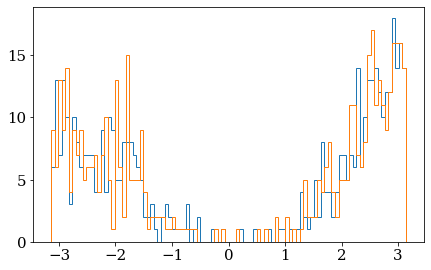

In [143]:
df = pi_pi_mc.query("diff_rap_cm > 1.5 and diff_rap_cm < 2.5  and h2_z<0.5 and h2_z<h1_z and h2_p>0")
plt.hist(df.query("h1_truth_cm_ph != 0 and h2_truth_cm_ph != 0").h1_truth_cm_ph,range=(-np.pi,np.pi),bins=100,histtype='step')
plt.hist(df.query("h1_truth_cm_ph != 0 and h2_truth_cm_ph != 0").h2_truth_cm_ph,range=(-np.pi,np.pi),bins=100,histtype='step')
plt.show()

(array([[15., 12.,  1., ...,  0.,  2.,  9.],
        [ 9., 11.,  7., ...,  0.,  0.,  1.],
        [ 1., 13.,  4., ...,  0.,  0.,  2.],
        ...,
        [ 0.,  0.,  0., ...,  8.,  8.,  5.],
        [ 1.,  0.,  0., ..., 11.,  8.,  7.],
        [10.,  0.,  0., ...,  4., 14., 14.]]),
 array([-3.14159265e+00, -3.07876080e+00, -3.01592895e+00, -2.95309709e+00,
        -2.89026524e+00, -2.82743339e+00, -2.76460154e+00, -2.70176968e+00,
        -2.63893783e+00, -2.57610598e+00, -2.51327412e+00, -2.45044227e+00,
        -2.38761042e+00, -2.32477856e+00, -2.26194671e+00, -2.19911486e+00,
        -2.13628300e+00, -2.07345115e+00, -2.01061930e+00, -1.94778745e+00,
        -1.88495559e+00, -1.82212374e+00, -1.75929189e+00, -1.69646003e+00,
        -1.63362818e+00, -1.57079633e+00, -1.50796447e+00, -1.44513262e+00,
        -1.38230077e+00, -1.31946891e+00, -1.25663706e+00, -1.19380521e+00,
        -1.13097336e+00, -1.06814150e+00, -1.00530965e+00, -9.42477796e-01,
        -8.79645943e-01, -8.168

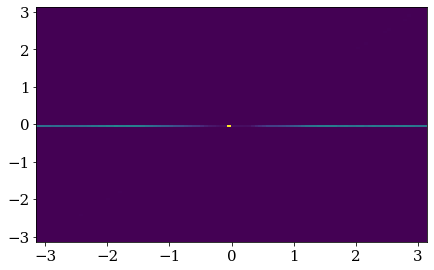

In [90]:
plt.hist2d(pi_p_mXcut_mc.h1_truth_cm_ph, pi_p_mXcut_mc.h2_truth_cm_ph,range=((-np.pi, np.pi),(-np.pi, np.pi)),bins=100)

<ipython-input-85-6fbcd082a03d>:67: RuntimeWarning: divide by zero encountered in true_divide
  print(yt/ysmc/(2*np.pi))
<ipython-input-85-6fbcd082a03d>:68: RuntimeWarning: divide by zero encountered in true_divide
  row[1].errorbar(x,yt/ysmc/(2*np.pi), yt/ysmc*np.hypot(dyt/yt,dysmc/ysmc)/(2*np.pi),color='g')
<ipython-input-85-6fbcd082a03d>:68: RuntimeWarning: invalid value encountered in true_divide
  row[1].errorbar(x,yt/ysmc/(2*np.pi), yt/ysmc*np.hypot(dyt/yt,dysmc/ysmc)/(2*np.pi),color='g')


[           inf            inf            inf 5.99136088e-01
 2.83265523e-03 2.33872585e-03 5.68212935e-01 2.98408426e+00
            inf            inf            inf            inf
            inf 3.07685372e+01 1.33072635e+01 4.02155604e+01
            inf            inf 6.20782295e+00            inf]


<ipython-input-85-6fbcd082a03d>:67: RuntimeWarning: divide by zero encountered in true_divide
  print(yt/ysmc/(2*np.pi))
<ipython-input-85-6fbcd082a03d>:68: RuntimeWarning: divide by zero encountered in true_divide
  row[1].errorbar(x,yt/ysmc/(2*np.pi), yt/ysmc*np.hypot(dyt/yt,dysmc/ysmc)/(2*np.pi),color='g')
<ipython-input-85-6fbcd082a03d>:68: RuntimeWarning: invalid value encountered in true_divide
  row[1].errorbar(x,yt/ysmc/(2*np.pi), yt/ysmc*np.hypot(dyt/yt,dysmc/ysmc)/(2*np.pi),color='g')


[       inf        inf        inf 2.71383966 0.00599583 0.00545246
 2.56186464        inf        inf        inf        inf        inf
        inf        inf        inf        inf        inf        inf
        inf        inf]


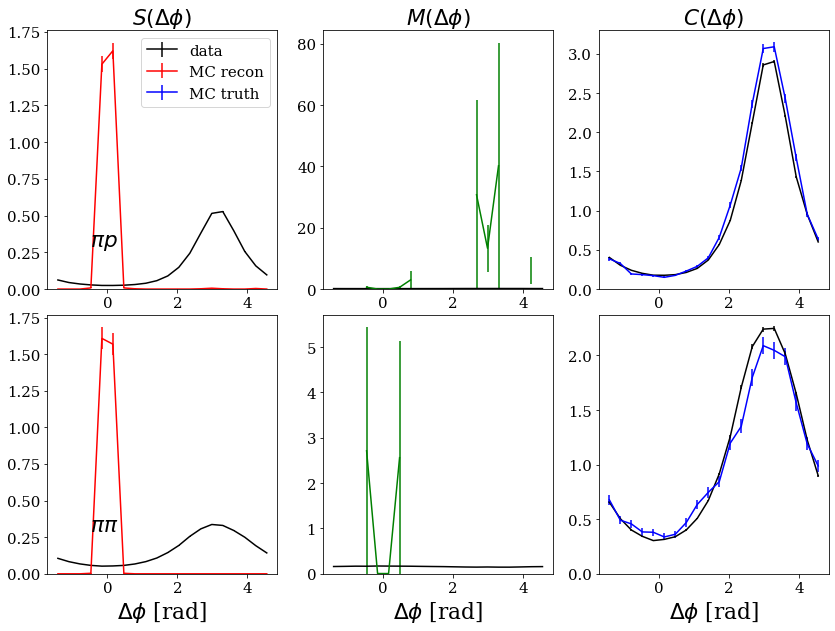

In [87]:
data_dihadrons = data_dihadrons_outb
data_mixed = data_mixed_outb
mc_dihadrons = mc_dihadrons_outb
data_mixed_ecuts = data_mixed_ecuts_outb
#mc_mixed = mc_mixed_outb
#mc_mixed_ecuts = mc_mixed_ecuts_outb

pi_p = data_dihadrons.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and h2_pid == 2212 and abs(h1_pid) ==211 and h2_z < 0.5")
pi_p_mixed = data_mixed.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and h2_pid == 2212 and abs(h1_pid) ==211 and h2_z < 0.5")
pi_p_mixed_ecuts = data_mixed_ecuts.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and h2_pid == 2212 and abs(h1_pid) ==211 and h2_z < 0.5")

pi_p_mXcut = data_dihadrons.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and h2_pid == 2212 and mx_eh1x > 1.665 and abs(h1_pid) ==211 and h2_z < 0.5")
pi_p_mXcut_mixed = data_mixed.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and h2_pid == 2212 and mx_eh1x > 1.665 and abs(h1_pid) ==211 and h2_z < 0.5")
pi_p_mXcut_mixed_ecuts = data_mixed_ecuts.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and h2_pid == 2212 and mx_eh1x > 1.665 and abs(h1_pid) ==211 and h2_z < 0.5")

#pi_p_mixed_mc = mc_mixed.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
#        + " and h2_pid == 2212 and abs(h1_pid) ==211 and h2_z < 0.5")
pi_p_mc = mc_dihadrons.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and h2_pid == 2212 and abs(h1_pid) ==211 and h2_z < 0.5")
#pi_p_mixed_ecuts_mc = mc_mixed_ecuts.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
#        + " and h2_pid == 2212 and abs(h1_pid) ==211 and h2_z < 0.5")

pi_p_mXcut_mc = mc_dihadrons.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and h2_pid == 2212 and mx_eh1x > 1.665 and abs(h1_pid) ==211 and h2_z < 0.5")
#pi_p_mXcut_mixed_mc = mc_mixed.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
#        + " and h2_pid == 2212 and mx_eh1x > 1.665 and abs(h1_pid) ==211 and h2_z < 0.5")




pi_pi = data_dihadrons.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and abs(h2_pid) == 211 and abs(h1_pid) ==211 and h2_z < 0.5")
pi_pi_mixed = data_mixed.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and abs(h2_pid) == 211 and abs(h1_pid) ==211 and h2_z < 0.5")
pi_pi_mixed_ecuts = data_mixed_ecuts.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and abs(h2_pid) == 211 and abs(h1_pid) ==211 and h2_z < 0.5")


pi_pi_mc = mc_dihadrons.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and abs(h2_pid) == 211 and abs(h1_pid) ==211 and h2_z < 0.5")
#pi_pi_mixed_mc = mc_mixed.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
#        + " and abs(h2_pid) == 211 and abs(h1_pid) ==211 and h2_z < 0.5")
#pi_pi_mixed_ecuts_mc = mc_mixed_ecuts.query("h1_cm_pt>0.3 and h2_cm_pt>0.3"\
#        + " and abs(h2_pid) == 211 and abs(h1_pid) ==211 and h2_z < 0.5")
main_plot()
plt.savefig("../images/mc_vs_data_outb.png", bbox_inches='tight')
#df_trig = data_triggers.query("h_cm_pt>0.3 and abs(h_pid) == 211")

In [11]:



def offset(a):
    return a+2*np.pi*(a<-np.pi/2)-2*np.pi*(a>=3*np.pi/2)
def corr1d(df,df_mixed,deta_range=(-1.5,2.5),bins=20,style='normal',area=None,
                          fig=None,projyrange=(1.5,2.5),bins1d=50,minbincontentindenom=3, normalizeMixedAt00=False):
    dphi_range = (-np.pi/2,3*np.pi/2)
    #if fig == None:
        #fig = plt.figure(figsize=(18,12))
    #ax1 = fig.add_subplot(231, projection='3d')
    #ax1.view_init(azim=-135)
    
    denom = len(df)*2*np.pi/bins*(deta_range[1]-deta_range[0])/bins
    
    #hist1,xedges, yedges = np.histogram2d([2,2,2,2],[0,0,0,0], bins=bins,range=[deta_range, dphi_range])
    hist1, xedges, yedges = np.histogram2d(df.diff_rap_cm, offset(df.diff_phi_cm), bins=bins, range=[deta_range, dphi_range])
    hist1 = np.divide(hist1, denom)
    
    
    
    print(xedges)
    hist2, xedges, yedges = np.histogram2d(df_mixed.diff_rap_cm, offset(df_mixed.diff_phi_cm), bins=bins, range=[deta_range, dphi_range])
    for i in range(bins):
        if xedges[i+1]>0:
            break
    for j in range(bins):
        if yedges[j+1]>0:
            break;
            
    radius = .3
    if normalizeMixedAt00:
        M00 = len(df_mixed.query('sqrt(diff_rap_cm**2+diff_phi_cm**2)<%s'%radius))/(np.pi*radius**2)
        #print("M(0,0) = ", M00)
        hist2 = np.divide(hist2,M00*(xedges[1]-xedges[0])*(yedges[1]-yedges[0]))
    else :
        hist2 = np.divide(hist2,len(df_mixed)*(xedges[1]-xedges[0])*(yedges[1]-yedges[0]))
    
    
    bins = bins1d
    #now for 1d projections:
    #ax4 = fig.add_subplot(234)
    
    denom = len(df)*2*np.pi/bins
    y, x = np.histogram(offset(df.query("diff_rap_cm > %s and diff_rap_cm < %s" %projyrange).diff_phi_cm), bins=bins, range=(-np.pi/2,3*np.pi/2))
    x = np.add(x[1:],x[:-1])/2
    dy = np.sqrt(y)
    y=np.divide(y,denom)
    dy=np.divide(dy,denom)
    
    
    def plot1d(x,y,dy,ax,n=5):
        if style=='normal':
            ax.errorbar(x,y,dy*(dy<1),marker='o',color='k',linestyle='')
            ax.axhline(0,color='0.7',linestyle=':')
            #a = [2*sum(y*np.sin(i*x))/len(x) for i in range(0,n+1)]
            #remove sin term
            #a = [0 for i in range(0,n+1)]
            b = [2*sum(y*np.cos(i*x))/len(x) for i in range(0,n+1)]
            b[0]/=2
            s = 0
            for i in range(0,n+1):
                s = b[i]*np.cos(i*x)+s
            ax.plot(x,s,linestyle='-',color='k',label='all')
            for i in range(1,n+1):
                ax.plot(x,b[i]*np.cos(i*x)+b[0]*(i!=0),linestyle='--', label="n=%s"%i)
            ax.set_xlim(-np.pi/2,np.pi*3/2)
        elif style=='fill':
            ax.bar(x,y*(y<3),x[1]-x[0],color='#ff7777',alpha=0.5)
            
    #plot1d(x,y,dy,ax4)
    #ax4.add_artist(AnchoredText("$%s<\Delta y<%s$" % projyrange,loc='upper left'))
    #ax4.set_xlabel("$\\Delta\\phi$ [rad]")
    
    
    mixed_highy = df_mixed.query("diff_rap_cm > %s and diff_rap_cm < %s" %projyrange)
    if(normalizeMixedAt00):
        denom = M00*2*np.pi/bins1d
    else :
        denom = len(mixed_highy)*2*np.pi/bins1d
    ym, _ = np.histogram(offset(mixed_highy.diff_phi_cm), bins=bins, range=(-np.pi/2,3*np.pi/2))
    ym = ym+(ym==0)*(max(ym)*.000001)
    dym = np.sqrt(ym)
    ym=np.divide(ym,denom)
    dym=np.divide(dym,denom)
    
    #ax5 = fig.add_subplot(235)
    #plot1d(x,ym,dym,ax5)
    #ax5.set_xlabel("$\\Delta\\phi$ [rad]")
    
    #ax6 = fig.add_subplot(236)
    dyc = y/ym*np.hypot(dy/y, dym/ym)
    yc= y/ym
    if(area != None):
        scale = area/(sum(yc)*(x[1]-x[0]))
        yc = yc*scale
        dyc =dyc*scale
    plot1d(x,yc,dyc,plt.gca())
    plt.gca().set_xlabel("$\\Delta\\phi$ [rad]")
    return x,yc, dyc




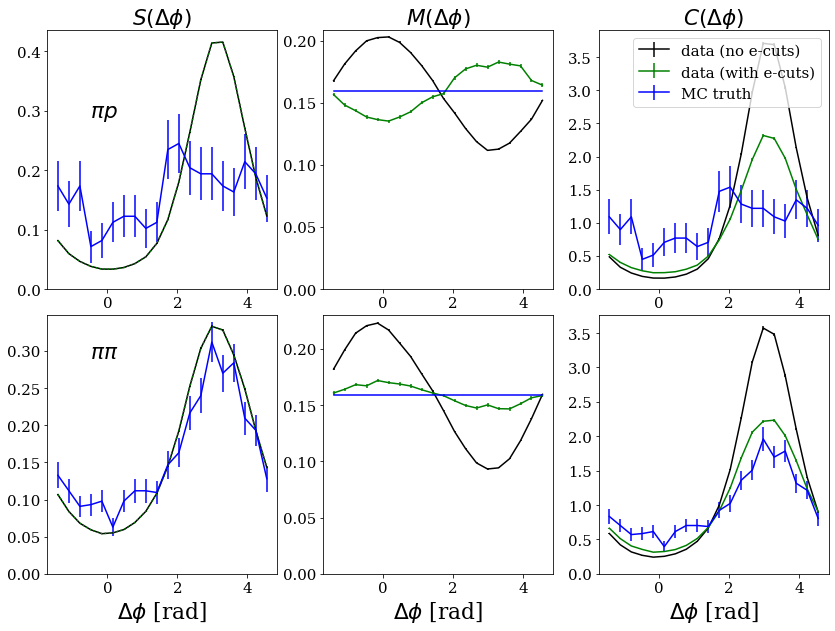

In [115]:
projyrange=(1.5,2.5)
bins = 20
fig,axs = plt.subplots(2,3,figsize=(14,10))
for df,df_mixed,df_mixed_ecuts,row,lbl in zip([pi_p_mXcut,pi_pi],[pi_p_mXcut_mixed,pi_pi_mixed],[pi_p_mXcut_mixed_ecuts,pi_pi_mixed_ecuts],axs,
                                                 "$\\pi{}p$ $\\pi\\pi$".split()):
    q = ("diff_rap_cm > %s and diff_rap_cm < %s" %projyrange) + " and h2_z<0.5 and h2_z<h1_z and h2_p>0"
    denom = len(df.query(q))*2*np.pi/bins
    ys, x = np.histogram(offset(df.query(q).diff_phi_cm), bins=bins, range=(-np.pi/2,3*np.pi/2))
    x = np.add(x[1:],x[:-1])/2
    dys = np.sqrt(ys)
    ys=np.divide(ys,denom)
    dys=np.divide(dys,denom)
    
    denom = len(df_mixed.query(q))*2*np.pi/bins
    ym, x = np.histogram(offset(df_mixed.query(q).diff_phi_cm), bins=bins, range=(-np.pi/2,3*np.pi/2))
    x = np.add(x[1:],x[:-1])/2
    dym = np.sqrt(ym)
    ym=np.divide(ym,denom)
    dym=np.divide(dym,denom)
    
    dyc = ys/ym*np.hypot(dys/ys, dym/ym)
    yc= ys/ym
    
    
    row[0].errorbar(x,ys,dys,color='k',label='data')
    row[0].errorbar(x,ys,dys,color='g',label='data',linestyle=':')
    row[1].errorbar(x,ym,dym,color='k')
    row[2].errorbar(x,yc,dyc,color='k',label='data (no e-cuts)')
    
    # ecuts version
    ym, x = np.histogram(offset(df_mixed_ecuts.query(q).diff_phi_cm), bins=bins, range=(-np.pi/2,3*np.pi/2))
    x = np.add(x[1:],x[:-1])/2
    denom = sum(ym)*(x[1]-x[0])
    dym = np.sqrt(ym)
    ym=np.divide(ym,denom)
    dym=np.divide(dym,denom)
    
    dyc = ys/ym*np.hypot(dys/ys, dym/ym)
    yc= ys/ym
    
    row[1].errorbar(x,ym,dym,color='g')
    row[2].errorbar(x,yc,dyc,color='g',label='data (with e-cuts)')
    for ax in row:
        ax.set_ylim(0)
    row[0].text(-.5, 0.29, lbl,fontsize='x-large')
    
    q = ("diff_rap_cm_truth > %s and diff_rap_cm_truth < %s" %projyrange) 
    q += " and h2_truth_z<0.5 and h1_truth_p>0 and h2_truth_p>0 "
    q += " and h1_truth_cm_pt>0.3 and h2_truth_cm_pt>0.3 and abs(h1_truth_pid) ==211 and h1_truth_z > 0.4"
    if df is pi_pi:
        q+= " and abs(h2_truth_pid) == 211"
    else:
        q+= " and h2_truth_pid == 2212 and mx_eh1x_truth > 1.665"
    yt,x = np.histogram(offset(mc_dihadrons.query(q).diff_phi_cm_truth), bins=bins, range=(-np.pi/2,3*np.pi/2))
    x = np.add(x[1:],x[:-1])/2
    
    denom = sum(yt)*(x[1]-x[0])
    dyt=np.sqrt(yt)/denom
    yt = yt/denom
    row[2].errorbar(x,yt*2*np.pi,dyt*2*np.pi,color='b',label='MC truth')
    row[1].errorbar(x,[1/(2*np.pi)]*len(x), [0]*len(x), color='b')
    row[0].errorbar(x,yt,dyt,color='b',label='MC truth')
axs[0][2].legend()

axs[0][0].set_title("$S(\\Delta\\phi)$")
axs[0][1].set_title("$M(\\Delta\\phi)$")
axs[0][2].set_title("$C(\\Delta\\phi)$")


fig.subplots_adjust(hspace=0.1)
for ax in axs[-1]:
    ax.set_xlabel("$\\Delta\\phi$ [rad]")
    
fig.savefig("../images/ecuts_vs_no_ecuts.pdf", bbox_inches='tight')

In [ ]:
projyrange=(1.5,2.5)
bins = 20
fig,axs = plt.subplots(1,2,figsize=(12,5))
for df,df_mixed,df_mc,df_mc_mixed,ax,lbl in zip([pi_p_mXcut,pi_pi],[pi_p_mXcut_mixed,pi_pi_mixed],
                                             [pi_p_mXcut_mc,pi_pi_mc],[pi_p_mXcut_mixed_mc,pi_pi_mixed_mc],axs,"$\\pi{}p$ $\\pi\\pi$".split()):
    q = ("diff_rap_cm > %s and diff_rap_cm < %s" %projyrange) + " and h2_z>0.1"
    denom = len(df.query(q))*2*np.pi/bins
    ys, x = np.histogram(offset(df.query(q).diff_phi_cm), bins=bins, range=(-np.pi/2,3*np.pi/2))
    x = np.add(x[1:],x[:-1])/2
    dys = np.sqrt(ys)
    ys=np.divide(ys,denom)
    dys=np.divide(dys,denom)
    
    ax.errorbar(x,ys,dys,color='k',label='data')
    
    
    denom = len(df_mc.query(q))*2*np.pi/bins
    ys, x = np.histogram(offset(df_mc.query(q).diff_phi_cm), bins=bins, range=(-np.pi/2,3*np.pi/2))
    x = np.add(x[1:],x[:-1])/2
    dys = np.sqrt(ys)
    ys=np.divide(ys,denom)
    dys=np.divide(dys,denom)
    
    
    
    
    ax.errorbar(x,ys,dys,color='r',label='MC')
    ax.set_ylim(0)
    ax.set_title(lbl)
axs[0].legend()

axs[0].set_ylabel("$S(\\Delta\\phi)$")

fig.subplots_adjust(hspace=0.1)
for ax in axs:
    ax.set_xlabel("$\\Delta\\phi$ [rad]")
    
fig.savefig("../images/mc_vs_data_same.pdf", bbox_inches='tight')

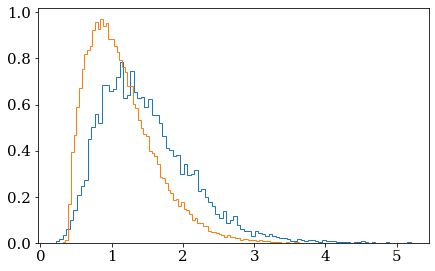

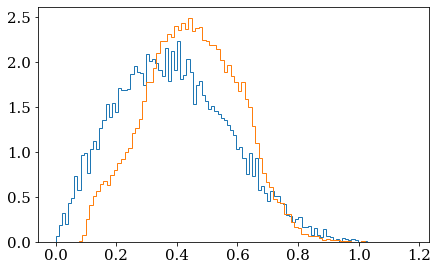

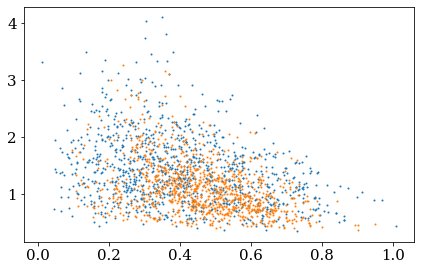

In [85]:
pass_truth = mc_dihadrons.query('h2_truth_p>0 and h1_truth_p>0 and e_truth_p>0 and e_truth_th>0 and h2_truth_pid==2212')
plt.hist(pass_truth.h2_truth_p,bins=100,histtype='step',density=True)
pass_recon = mc_dihadrons.query('h2_p>0')
plt.hist(pass_recon.h2_p,bins=100,histtype='step',density=True)
plt.show()

plt.hist(pass_truth.h2_truth_th,bins=100,histtype='step',density=True)
plt.hist(pass_recon.h2_th,bins=100,histtype='step',density=True)
plt.show()

n=1000
plt.scatter(pass_truth[:n].h2_truth_th,pass_truth[:n].h2_truth_p,1)
plt.scatter(pass_recon[:n].h2_th,pass_recon[:n].h2_p,1)
plt.show()

(array([5.46849052e-04, 5.49667861e-04, 5.38392623e-04, 5.73627742e-04,
        5.05976313e-04, 5.70808933e-04, 5.05976313e-04, 5.11613932e-04,
        4.73560003e-04, 4.72150599e-04, 4.03089765e-04, 3.32619526e-04,
        3.15706669e-04, 2.55102264e-04, 1.95907263e-04, 8.73830959e-05,
        1.83222620e-05, 5.63761909e-05, 1.38121668e-04, 2.49464645e-04,
        3.34028931e-04, 4.45371908e-04, 5.45439647e-04, 6.99064767e-04,
        8.73830959e-04, 1.10920156e-03, 1.43054584e-03, 1.87873656e-03,
        2.48196180e-03, 3.37975264e-03, 5.64889433e-03, 1.14274539e-02,
        2.11904007e-02, 3.10886505e-02, 7.52382549e-02, 2.09656007e-01,
        4.19242953e-01, 5.61250349e-01, 5.77740385e-01, 6.06224456e-01,
        6.74004141e-01, 7.67170024e-01, 8.08481088e-01, 8.20384920e-01,
        8.72493434e-01, 8.75757615e-01, 8.45850046e-01, 8.28573562e-01,
        8.14762805e-01, 7.82817236e-01, 7.39854350e-01, 6.95948573e-01,
        6.48312101e-01, 5.96508019e-01, 5.44261384e-01, 4.912649

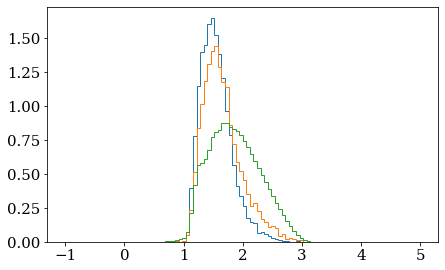

In [131]:

args=dict(bins=100, histtype='step',density=True,range=(-1, 5))
plt.hist(mc_dihadrons.query("h1_truth_p*h2_truth_p*e_truth_p>0 and h1_truth_cm_pt>0 and h2_truth_cm_pt>0 and h2_truth_pid==2212").mx_eh1x_truth,**args)
plt.hist(mc_dihadrons.query("h1_truth_p*h2_truth_p*e_truth_p>0 and h1_truth_cm_pt>0 and h2_truth_cm_pt>0  and h2_truth_pid==2212").mx_eh1x,**args)
plt.hist(data_dihadrons.query("h2_pid == 2212").mx_eh1x,**args)

NameError: name 'corr1d' is not defined

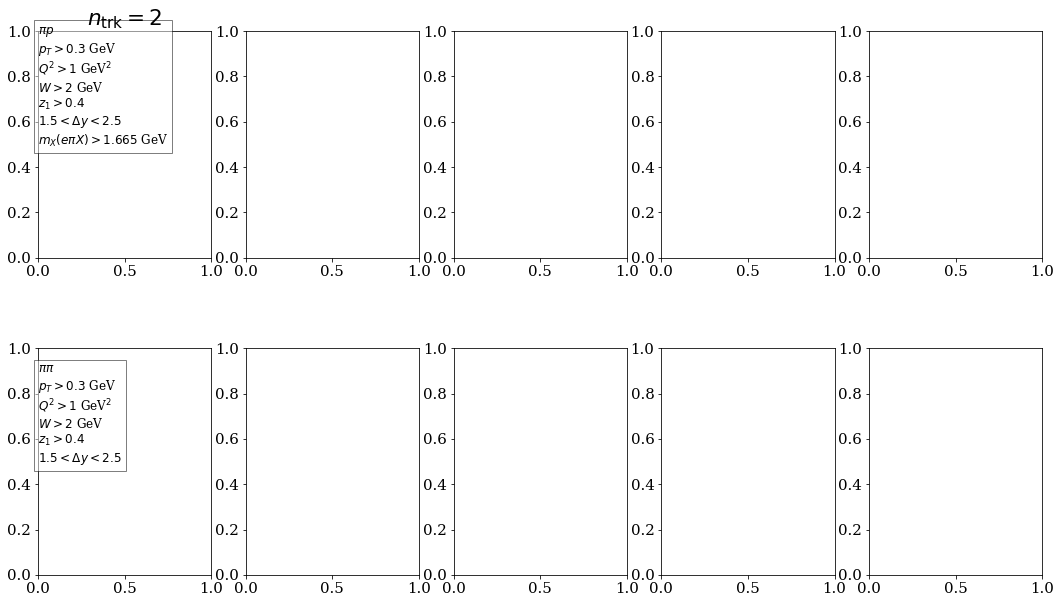

In [12]:
fig,axs = plt.subplots(2,5, figsize=(18,10))
fig.subplots_adjust(hspace=0.4)

axs[0][0].text(0,0.5,"$\pi p$\n$p_T>0.3$ GeV\n$Q^2>1$ GeV$^2$\n$W>2$ GeV\n$z_{1}>0.4$\n$1.5<\Delta y<2.5$\n$m_X(e\pi X)>1.665$ GeV",
               bbox=dict(facecolor='white', alpha=0.5),transform=axs[0][0].transAxes,fontsize=12)
#axs[1][0].add_artist(AnchoredText("$\pi\pi$\n$p_T>0.3$ GeV\n$Q^2>1$ GeV$^2$\n$W>2$ GeV\n$z_{1}>0.5$\n$1.5<\Delta y<2.5$",loc='upper left'))
axs[1][0].text(0,0.5,"$\pi\pi$\n$p_T>0.3$ GeV\n$Q^2>1$ GeV$^2$\n$W>2$ GeV\n$z_{1}>0.4$\n$1.5<\Delta y<2.5$",
               bbox=dict(facecolor='white', alpha=0.5),transform=axs[1][0].transAxes,fontsize=12)

for q,label,ax1,ax2 in zip(["nhtracks == 2","nhtracks == 3","nhtracks == 4","nhtracks == 5", "nhtracks >=6"],
                   ['$n_{\\mathrm{trk}}' + k +"$" for k in '=2 =3 =4 =5 >=6'.split()],
                   axs[0],axs[1]):
    ax1.set_title(label)
    plt.sca(ax1)
    x,y,dy = corr1d(pi_p_mXcut.query(q),pi_p_mXcut_mixed.query(q),deta_range=(-1.5,2.5),bins=20,
                          fig=None,projyrange=(1.5,2.5),bins1d=50,minbincontentindenom=3, normalizeMixedAt00=False)
    area = sum(y)*(x[1]-x[0])
    corr1d(pi_p_mXcut_mc.query(q),pi_p_mXcut_mixed_mc.query(q),deta_range=(-1.5,2.5),bins=20,area=area,
                          fig=None,projyrange=(1.5,2.5),bins1d=20,minbincontentindenom=3, normalizeMixedAt00=False,style='fill')
    ax2.set_title(label + ",   $\pi\pi$")
    plt.sca(ax2)
    x,y,dy = corr1d(pi_pi.query(q),pi_pi_mixed.query(q),deta_range=(-1.5,2.5),bins=20,
                          fig=None,projyrange=(1.5,2.5),bins1d=50,minbincontentindenom=3, normalizeMixedAt00=False)
    area = sum(y)*(x[1]-x[0])
    x,y,dy = corr1d(pi_pi_mc.query(q),pi_pi_mixed_mc.query(q),deta_range=(-1.5,2.5),bins=20,area=area,
                          fig=None,projyrange=(1.5,2.5),bins1d=20,minbincontentindenom=3, normalizeMixedAt00=False,style='fill')
    print("x,y,dy = ", x,y,dy)
plt.savefig("../images/corrs_vs_ntracks_with_mc.pdf",bbox_inches='tight')